# PROJECT - Zomato API 2

## 3. Visualization

### 3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.

#### In the following cell, I have
1. imported the required libraries which are: numpy, pandas and matplotlib.pyplot

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#### In the following cell, I have
1. Initialised the dataframe with the provided zomato csv
2. Copied the dataframe to a new dataframe(df)
3. Grouped the dataframe(df) by restaurant name and applied aggregate count function, set this count column name as TotalRestcount, reset the index and stored in a new dataframe(df1)
4. Sorted the dataframe(df1) on decreasing order of TotalRestcount, filtered only the top 15 from them and stored them to a new dataframe(dfFinal) 

In [3]:
dataframe = pd.read_csv("zomato.csv", encoding="ISO-8859-1")
df = dataframe.copy()
df1 = df.groupby(['Restaurant Name'])['Restaurant Name'].agg('count').to_frame('TotalRestCount').reset_index()
dfFinal = df1.sort_values('TotalRestCount',ascending=False)[0:15]
dfFinal

,Restaurant Name,TotalRestCount
1099,Cafe Coffee Day,83
2099,Domino's Pizza,79
6106,Subway,63
2717,Green Chick Chop,51
4077,McDonald's,48
3479,Keventers,34
4961,Pizza Hut,30
2620,Giani,29
681,Baskin Robbins,28
664,Barbeque Nation,26


#### In the following cell, I have
1. Plotted a horizontal bar graph with restaurant name and TotalRestCount from dataframe(dfFinal)

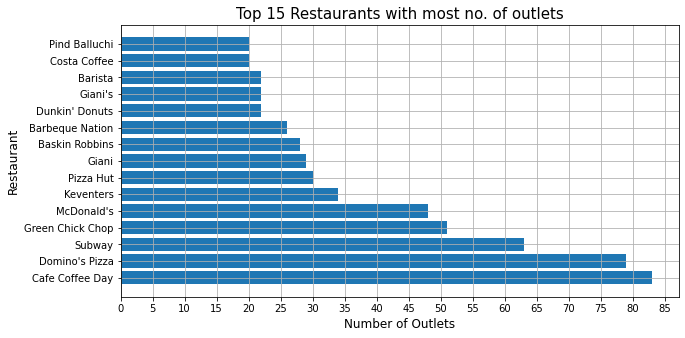

In [4]:
plt.figure(figsize=(10, 5))
plt.barh(dfFinal["Restaurant Name"], dfFinal["TotalRestCount"])
plt.xticks(np.arange(0,90,5))
plt.style.use("ggplot")
plt.ylabel('Restaurant', size=12)
plt.xlabel('Number of Outlets', size=12)
plt.title('Top 15 Restaurants with most no. of outlets',size=15)
plt.grid()
plt.show()

### 3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

#### In the following cell, I have
1. Copied the original dataframe to a new dataframe(df)
2. Deleted rows where aggregate rating is null
3. Plotted a histogram with aggregate rating 

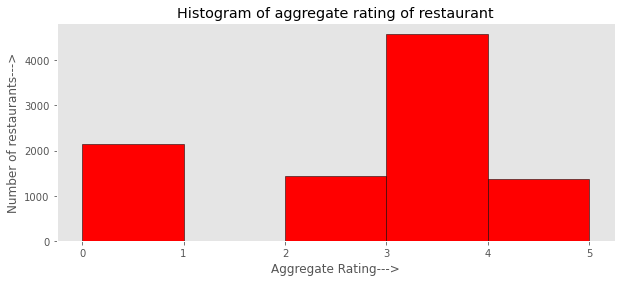

In [5]:
df = dataframe.copy()
x=df['Aggregate rating'].dropna()
plt.figure(figsize=(10, 4))
plt.xticks(range(6))
#plt.style.use("ggplot")
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Number of restaurants--->')
plt.title("Histogram of aggregate rating of restaurant")
plt.hist(x, color='red', edgecolor='black', bins=range(6))
plt.grid()
plt.show()

### 3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.

##### In the following cell, I have
1. Copied the original dataframe to a new dataframe(df)
2. Grouped the dataframe(df) by restaurant name and applied aggregate sum function on Votes, set this sum column name as TotalVotes, reset the index and stored in a new dataframe(df1)
3. Sorted the dataframe(df1) on decreasing order of TotalVotes, filtered only the top 10 from them and stored them to a new dataframe(dfFinal)

In [6]:
df = dataframe.copy()
df1 = df.groupby(['Restaurant Name']).Votes.agg('sum').to_frame('TotalVotes').reset_index()
dfFinal = df1.sort_values('TotalVotes',ascending=False)[0:10]
dfFinal

,Restaurant Name,TotalVotes
664,Barbeque Nation,28142
102,AB's - Absolute Barbecues,13400
6943,Toit,10934
786,Big Chill,10853
2298,Farzi Cafe,10098
6988,Truffles,9682
1511,Chili's,8156
2880,Hauz Khas Social,7931
3262,Joey's Pizza,7807
4902,Peter Cat,7574


#### In the following cell, I have
1. Plotted a horizontal bar graph between restaurant name and totalVotes

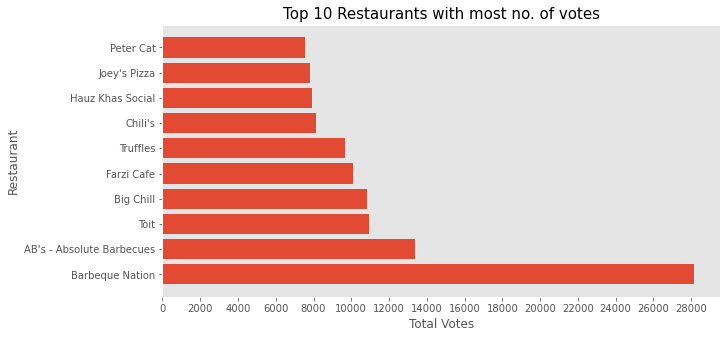

In [7]:
plt.figure(figsize=(10, 5))
plt.barh(dfFinal["Restaurant Name"], dfFinal["TotalVotes"])
plt.xticks(np.arange(0,30000,2000))
plt.style.use("ggplot")
plt.ylabel('Restaurant', size=12)
plt.xlabel('Total Votes', size=12)
plt.title('Top 10 Restaurants with most no. of votes',size=15)
plt.grid()
plt.show()

### 3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.

#### In the following cell, I have
1. Copied the original dataframe to a new dataframe(df)
2. Retained only those rows which have its currency as Dollar
3. Deleted all rows where cuisines is null
4. Created a cuisineList for storing all cuisines 
5. Itrated over df.Cuisines. For each entry, I splitted them based on "," , stripped them based on space appended it into the list(cuisineList) 
6. Itrated over this list(cuisineList) and entered them into a dictionary
7. Stored keys and values from this dictionary into two separate lists(cuisineName, cuisineCount)
8. Converted these 2 lists into numpy arrays, sorted them in decreasing order of npCuisinecount and retained only the top 10 in that numpy array
9. Printed these lists 
10. Plotted a pie chart with npCuisineCount as values and npCuisineName as labels

Top 10 most Popular Cuisines in US
-----------------------------------
American (in 117 restaurants)
Seafood (in 63 restaurants)
Pizza (in 51 restaurants)
Burger (in 51 restaurants)
Sandwich (in 50 restaurants)
Steak (in 44 restaurants)
Italian (in 42 restaurants)
Breakfast (in 41 restaurants)
Mexican (in 37 restaurants)
Sushi (in 35 restaurants)


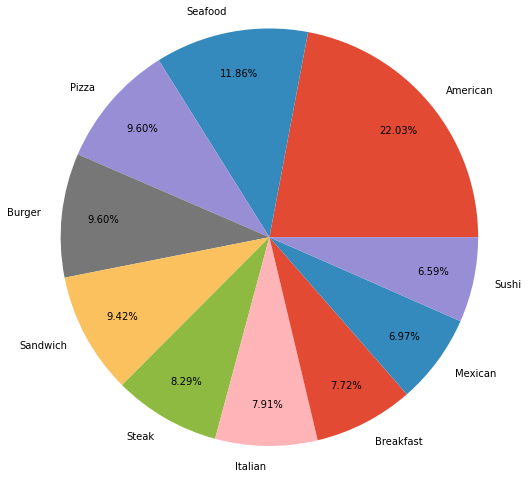

In [8]:
df = dataframe.copy()
df = df[df.Currency == "Dollar($)"]
df=df.loc[df['Cuisines'].notnull()]

cuisineList = []

for row in df.Cuisines:
    for cuisine in row.split(","):
        cuisineList.append(cuisine.strip())

dictCuisine = dict()
for i in cuisineList:
    if i in dictCuisine.keys():
        dictCuisine[i] += 1
    else:
        dictCuisine[i] = 1
cuisineName = []
cuisineCount = []
for i in dictCuisine:
    cuisineName.append(i)
    cuisineCount.append(dictCuisine[i]) 

npCuisineName = np.array(cuisineName)
npCuisineCount = np.array(cuisineCount)

npCuisineName = npCuisineName[np.argsort(npCuisineCount)][::-1][0:10]
npCuisineCount= npCuisineCount[np.argsort(npCuisineCount)][::-1][0:10]

print("Top 10 most Popular Cuisines in US")
print("-----------------------------------")
for i in range(len(npCuisineName)):
    print(npCuisineName[i],f"(in {npCuisineCount[i]} restaurants)")

plt.pie(npCuisineCount,labels=npCuisineName, radius=2.4,autopct="%.2f%%",pctdistance=.8)
plt.style.use("ggplot")
plt.show()


### 3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

#### In the following cell, I have
1. Copied the original dataframe to a new dataframe(df)
2. Retained only those rows which have its Country code as 1
3. Dropped unnecessary columns 
4. Dropped all of the rows which have null values in any of the following columns : City, Aggregate rating or Restaurant name 
5. Created a new column(VotesRatingProduct) which is the product of votes and Aggregate Rating
6. Grouped by City and found out the sum of column(VotesRatingProduct) and stored into a dataframe(dfSUMVotesRatingProduct)
7. Grouped by City and found out the sum of column(Votes) and stored into a dataframe(dfSUMVotes)
8. Merged the dataframes(dfSUMVotesRatingProduct, dfSUMVotes) on City and stored it as df1
9. Created a new column(weighted) which is the result of SUMVotesRatingProduct/SUMVotes in dataframe(df1)
10. Merged the dataframes(df, df1) on City and stored as df2 for referenece purposes
11. Grouped the dataframe(df) by City and applied aggregate count function, set this count column name as TotalRestcount, reset the index and stored in a new dataframe(df3)
12. Merged the dataframes(df1, df3) on City and stored as df4

In [9]:
df = dataframe.copy()
df = df[df["Country Code"] == 1]
df.head(1)
df = df.drop(columns=['Locality Verbose', 'Longitude', 'Latitude','Rating color', 'Rating text','Restaurant ID','Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu','Address',
       'Price range','Country Code' ])
df.dropna(subset=['City'],inplace=True)
df.dropna(subset=['Aggregate rating'],inplace=True)
df.dropna(subset=['Restaurant Name'],inplace=True)
df["VotesRatingProduct"] = round(df["Votes"] * df["Aggregate rating"],2)

dfSUMVotesRatingProduct = df.groupby(['City']).VotesRatingProduct.agg('sum').to_frame('SUMVotesRatingProduct').reset_index()
dfSUMVotes = df.groupby(['City']).Votes.agg('sum').to_frame('SUMVotes').reset_index()

df1 = pd.merge(dfSUMVotesRatingProduct, dfSUMVotes, on='City')
df1["Weighted"] = df1["SUMVotesRatingProduct"] / df1["SUMVotes"]
df2 = pd.merge(df, df1, on='City')
df2.head(10)


df3 = df.groupby(['City'])['City'].agg('count').to_frame('TotalRestCount').reset_index()
df4 = pd.merge(df1, df3, on='City')
df4

,City,SUMVotesRatingProduct,SUMVotes,Weighted,TotalRestCount
0,Agra,8262.4,2062,4.006984,20
1,Ahmedabad,51066.0,12266,4.163215,21
2,Allahabad,4746.2,1392,3.409626,20
3,Amritsar,13797.2,3665,3.764584,21
4,Aurangabad,4441.8,1296,3.427315,20
5,Bangalore,252372.9,56115,4.497423,20
6,Bhopal,11870.3,2877,4.125930,20
7,Bhubaneshwar,16835.2,4243,3.967759,21
8,Chandigarh,42475.5,10343,4.106691,18
9,Chennai,119633.6,27695,4.319682,20


#### In the following cell, I have
1. Deleted rows from df4 which have weighted as Nan 
2. Applied a round function on df4.weighted with decimal places as 2
3. Sorted df4 in descending order of weighted and stored in a new dataframe (dfFinal)
4. Printed Cities, No of restaurants and their weightedrating from dfFinal 

In [10]:
df4.dropna(subset=['Weighted'],inplace=True)
decimals = 2 
df4['Weighted'] = df4['Weighted'].apply(lambda x: round(x, decimals))
dfFinal = df4.sort_values('Weighted',ascending=False)

print("Cities, No. of restaurants and weighted restaurant rating")
print("-----------------------------------------------------------")
count = 0
for index, row in dfFinal.iterrows():
    print(count+1,". ",end=" ")
    print(row.City,row.TotalRestCount,row.Weighted, sep=" : ")
    count+=1

Cities, No. of restaurants and weighted restaurant rating
-----------------------------------------------------------
1 .  Secunderabad : 2 : 4.55
2 .  Bangalore : 20 : 4.5
3 .  Hyderabad : 18 : 4.49
4 .  Chennai : 20 : 4.32
5 .  Lucknow : 21 : 4.32
6 .  Mohali : 1 : 4.3
7 .  Kolkata : 20 : 4.3
8 .  Jaipur : 20 : 4.28
9 .  Pune : 20 : 4.28
10 .  Guwahati : 21 : 4.27
11 .  Mumbai : 20 : 4.22
12 .  Panchkula : 1 : 4.2
13 .  Coimbatore : 20 : 4.17
14 .  Ahmedabad : 21 : 4.16
15 .  Goa : 20 : 4.16
16 .  Kochi : 20 : 4.14
17 .  Vadodara : 20 : 4.13
18 .  Vizag : 20 : 4.13
19 .  Bhopal : 20 : 4.13
20 .  Chandigarh : 18 : 4.11
21 .  Nagpur : 20 : 4.11
22 .  Ludhiana : 20 : 4.08
23 .  Surat : 20 : 4.02
24 .  Dehradun : 20 : 4.02
25 .  Agra : 20 : 4.01
26 .  Indore : 20 : 4.0
27 .  Bhubaneshwar : 21 : 3.97
28 .  Kanpur : 20 : 3.85
29 .  New Delhi : 5473 : 3.77
30 .  Mangalore : 20 : 3.76
31 .  Mysore : 20 : 3.76
32 .  Amritsar : 21 : 3.76
33 .  Gurgaon : 1118 : 3.74
34 .  Puducherry : 20 : 3.74

#### In the next 3 following cells, I have 
1. Plotted 3 varitions for the scatter plot.

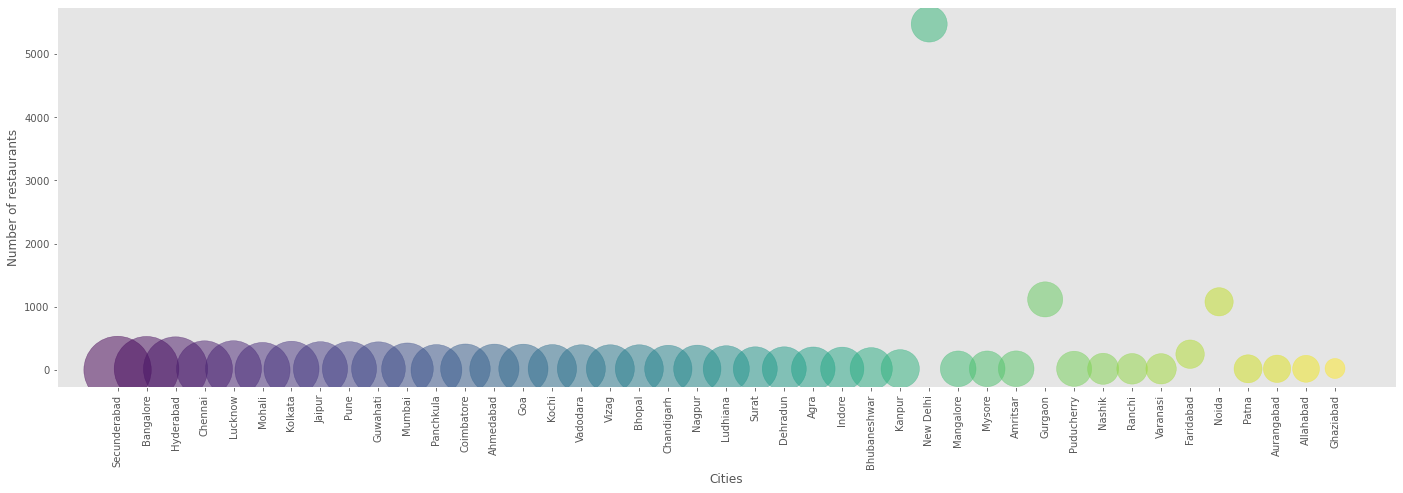

In [11]:
f, ax = plt.subplots(figsize=(24,7))
plt.xticks(rotation = "vertical")
s = [3*5**n for n in dfFinal.Weighted]
c = np.arange(len(dfFinal.City))
plt.scatter(dfFinal.City,dfFinal.TotalRestCount, s=s,c=c, alpha=.5)
plt.ylabel('Number of restaurants')
plt.xlabel('Cities')
plt.grid()
plt.show()

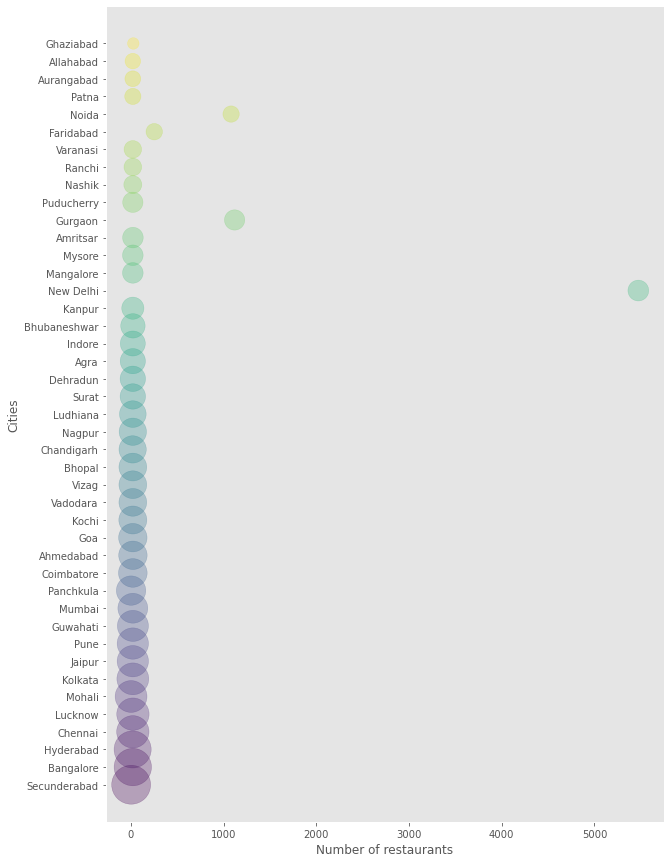

In [12]:

plt.figure(figsize=(10, 15))
plt.scatter(dfFinal.TotalRestCount, dfFinal.City, s=5**np.array(dfFinal.Weighted), alpha=0.3, c=c)
plt.xlabel('Number of restaurants')
plt.ylabel('Cities')
#plt.text(dfFinal.TotalRestCount, dfFinal.City,dfFinal.Weighted)
plt.grid()
plt.show()


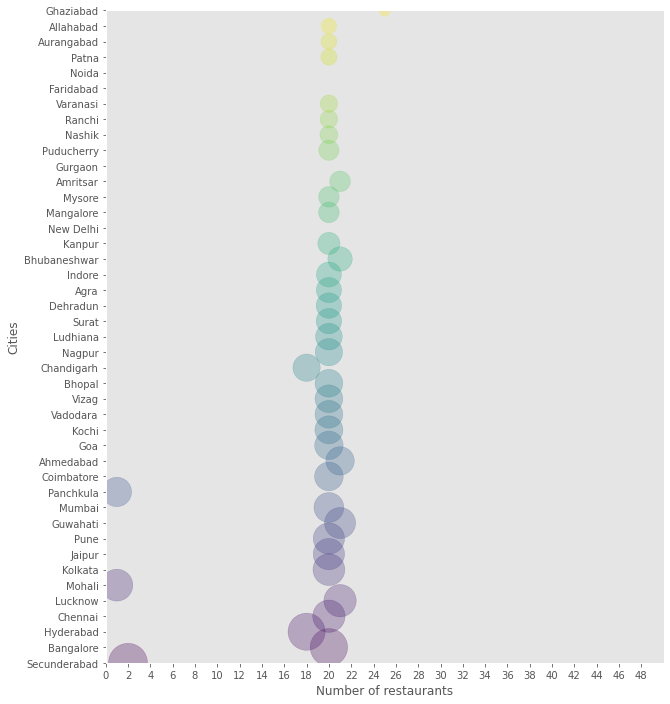

In [13]:
plt.figure(figsize=(10, 12))
plt.scatter(dfFinal.TotalRestCount, dfFinal.City, s=5**np.array(dfFinal.Weighted), alpha=0.3, c=c)
plt.xlabel('Number of restaurants')
plt.ylabel('Cities')
plt.axis([0, 50, 'Secunderabad', 'Ghaziabad'])
plt.xticks(np.arange(0,50,2))
plt.grid()
plt.show()